# GDG NTPU 社課 - 數據一把抓! Python自動化爬蟲實作
### 主題: DrissonPage 爬蟲實作 - 北大課程查詢系統
### 講者: Isaac
### 日期: 2025/03/06

專案目標: 透過DrissionPage爬蟲技術，自動化獲取北大課程查詢系統的課程資訊，並進行資料分析的資料來源。

## Step 0: 思考爬蟲流程
今天我想要找我所屬學院112年的所有課程，想想看你是怎麼查詢資料的

1. 點擊網頁(北大課程查詢系統)
2. 選擇我要的搜尋方式
3. 輸入學院、學年、學期
4. 點擊搜尋
5. 等待網頁載入
6. 查看資料
7. 把有用的資料爬取下來



下載DrissionPage套件

[參考網址](https://www.drissionpage.cn/get_start/installation)

In [ ]:
# !pip install DrissionPage

## Step 1: 匯入套件，並且進入北大課程查詢系統
### 初始化我的瀏覽器
這一步成功時，會開啟一個瀏覽器視窗，並且前往北大課程查詢系統的網頁
>如果使用selenium，還需要下載chromedriver，並且把chromedriver.exe放在python的安裝目錄下，還要定期更新(超級麻煩)

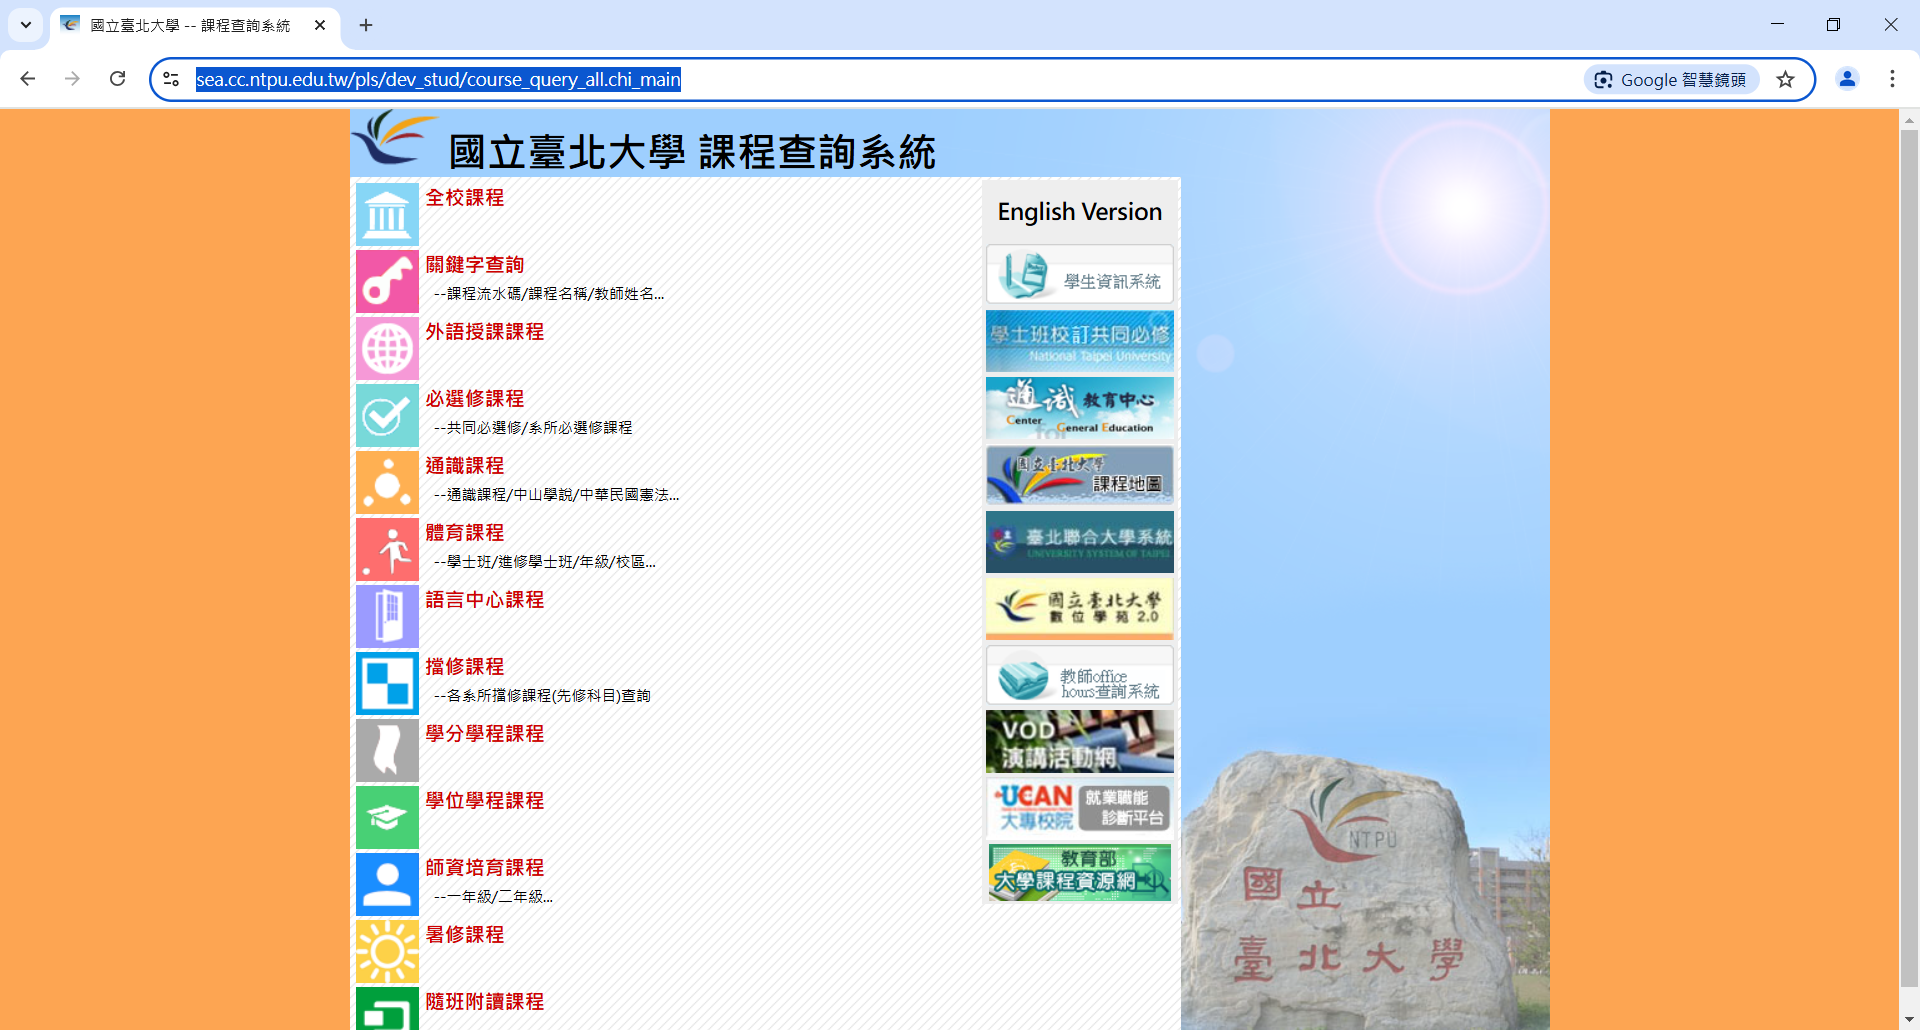


這邊可能要注意一下Python的版本是兼容

我自己本身適用3.11.2

In [ ]:
from DrissionPage import errors
from DrissionPage import ChromiumPage

# 設定我要去的網頁
url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query_all.chi_main"
# 初始化瀏覽器設定
page❓❓❓

# 讓瀏覽器開啟網頁
page❓❓❓


True

## Step 2: 選擇搜尋方式

### 觀察網頁規律
點擊右鍵觀察網頁原始碼，發現網頁架構中的規律:

每一個搜尋方式都有相同的class名稱，所以我們可以用這個`class名稱作為元素`來找到我們要的搜尋方式
#### 注意⚠️ 
- page.ele: 僅會抓取第一個元素
- page.eles: 則會抓取所有符合條件的元素，可以在程式碼最後加上[0], [1]...來選取第幾個元素

In [ ]:
# 初始化並打開頁面
url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query_all.chi_main"
#初始化瀏覽器設定
page = ChromiumPage()
page = page.get(url)

#找到頁面的所有tr
rows = page❓❓❓
#print(len(rows)) #印出有幾個tr

#找到第一個
row = rows ❓❓❓
row ❓❓❓

True

順利的話會回傳true，電腦會自動進入這個畫面。

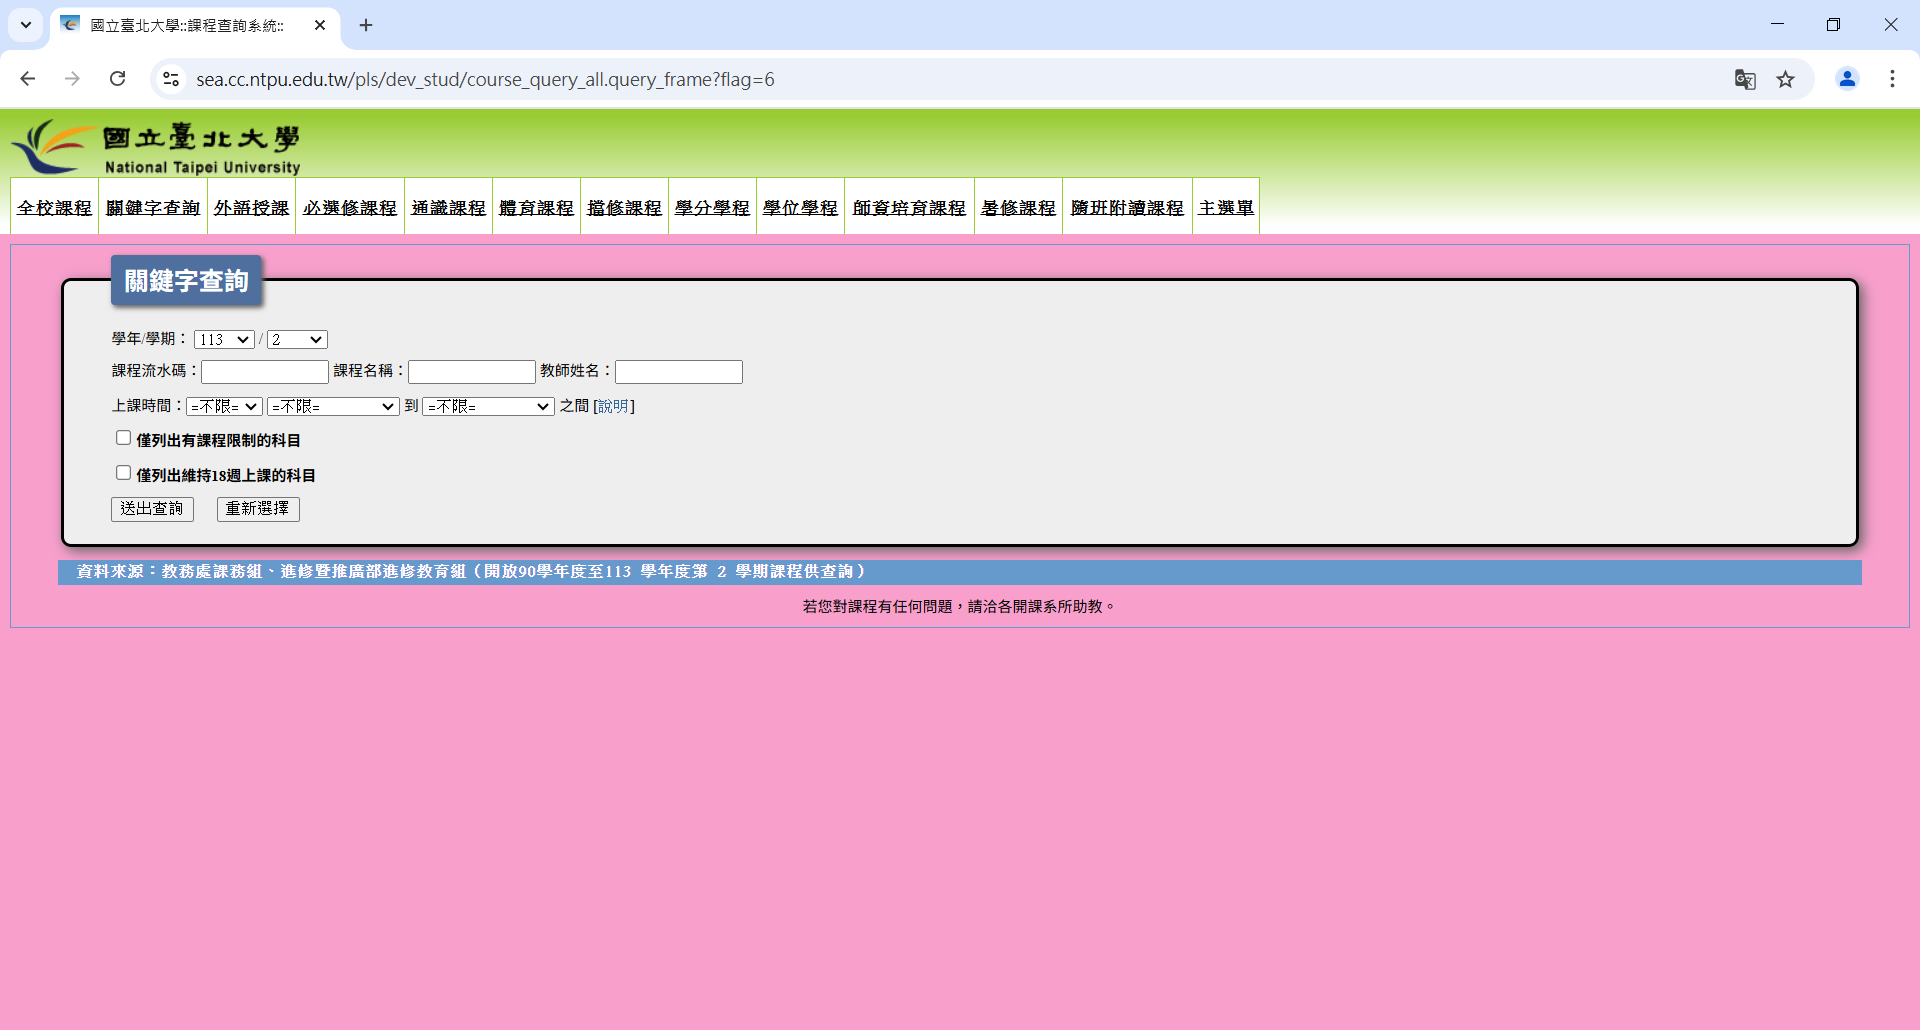

## Step 3: 自動選擇條件
這邊我們同樣先觀察網頁，發現第一個條件【學士班】建立在input標籤中，所以我們可以用`input標籤`來找到我們要的條件。

### XPath
>`XPath`就像是門牌地址，這個地址是唯一的，所以我們可以用這個地址來找到我們要的條件。

#### 注意⚠️ 

在後端渲染的爬蟲中經常需要等待(`page.wait(秒數)`)因為網頁載入需要時間，所以我們要確保網頁載入完成後再進行下一步動作。 同時避免請求次數過多，導致被封鎖。

In [ ]:
# 初始化並打開頁面
url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query_all.chi_main"
#初始化瀏覽器設定
page = ChromiumPage()
page.get(url)

#找到頁面的所有tr
rows = page.eles(".titletext")

#找到第一個
row = rows[0]
row.click()

#有一個select的選單
select = ❓❓❓

page.wait(1) 

becholar = ❓❓❓ #學士班是第二個
becholar.click()

若成功的話，應該會看到學士班的圈圈是黑色的。

接著，我們要選擇學院，這邊我們可以用`select標籤`

#### 補充
`//` 是 相對選擇器，它表示「在整個 DOM (把HTML想像成一棵樹)結構中搜尋符合條件的元素」，無論其在 HTML 結構中的深度如何。

`/` 是 絕對選擇器，它表示「在當前元素的子元素中搜尋符合條件的元素」，只在當前元素的子元素中搜尋，有點像是「直接下層」的意思。
```HTML
<html>
 ├── <head>
 │    └── <title>我的網頁</title>
 ├── <body>
 │    ├── <h1>歡迎來到我的網站</h1>
 │    ├── <p id="intro">這是一個簡單的介紹。</p>
 │    ├── <input type="radio" name="option" value="A">
 │    ├── <input type="radio" name="option" value="B">
 ```


In [ ]:
# 初始化並打開頁面
url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query_all.chi_main"
#初始化瀏覽器設定
page = ChromiumPage()
page.get(url)

#找到頁面的所有tr
rows = page.eles(".titletext")

#找到第一個
row = rows[0]
row.click()

#有一個select的選單
select = page.eles("xpath://input[@type='radio']")
page.wait(1)
becholar = select[1]
becholar.click()

# page.wait(1)
#找到學院的選單
dep = ❓❓❓
dep.click()

#輸入你所屬的學院
dep_option = ❓❓❓
dep_option.click()

再來，輸入你要找的學院跟學年取代❓❓❓

In [ ]:
# 初始化並打開頁面
url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query_all.chi_main"
#初始化瀏覽器設定
page = ChromiumPage()
page.get(url)

#找到頁面的所有tr
rows = page.eles(".titletext")

#找到第一個
row = rows[0]
row.click()

#有一個select的選單
select = page.eles("xpath://input[@type='radio']")
page.wait(1)
becholar = select[1]
becholar.click()

# page.wait(1)
#找到學院的選單
dep = page.eles("xpath://select")[0]
dep.click()

#選擇你要的學院
dep_option = page.ele("xpath://option[contains(text(),'❓❓❓')]")
dep_option.click()

page.wait(1)

#找到開課的選單
year = page.eles("xpath://select")[2]
year.click()

#選擇你要的開課年度
year_option = page.ele("xpath://option[contains(text(❓❓❓),')]")
page.wait(1)
year_option.click()

最後，找到學期的條件。
1. 點擊右鍵
2. 檢查
3. 在右側的標籤中找到你要的條件
4. 再次點擊右鍵
5. Copy -> Copy XPath
>完整的xpath也是一種方法滿足我們選擇的條件，但風險是，如果網頁結構改變，這個xpath就會失效。



按下輸入鍵，跳轉到課程查詢的頁面。

In [ ]:
# 初始化並打開頁面
url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query_all.chi_main"
#初始化瀏覽器設定
page = ChromiumPage()
page.get(url)

#找到頁面的所有tr
rows = page.eles(".titletext") #加上.才符合Drissionpage的樣式

#找到第一個
row = rows[0]
row.click()

#有一個select的選單
select = page.eles("xpath://input[@type='radio']")
page.wait(1)
becholar = select[1]
becholar.click()

# page.wait(1)
#找到學院的選單
dep = page.eles("xpath://select")[0]
dep.click()

#選擇你要的學院
dep_option = page.ele("xpath://option[contains(text(),'❓❓❓')]")
dep_option.click()

page.wait(1)

#找到開課的選單
year = page.eles("xpath://select")[2]
year.click()

year_option = page.ele("xpath://option[contains(text(),'❓❓❓')]")
page.wait(1)
year_option.click()

page.wait(1)
#找到學期的選單
semester = page.eles("xpath://select")[3]
semester.click()

# semester_option = page.ele("xpath://option[contains(text(),'全部')]")
semester_option = page.ele("xpath:/html/body/center/table/tbody/tr/td/table/tbody/tr[1]/td/fieldset/form[2]/p[3]/select[2]/option[1]")
page.wait(1)
semester_option.click()

設定到這邊應該要像下圖一樣

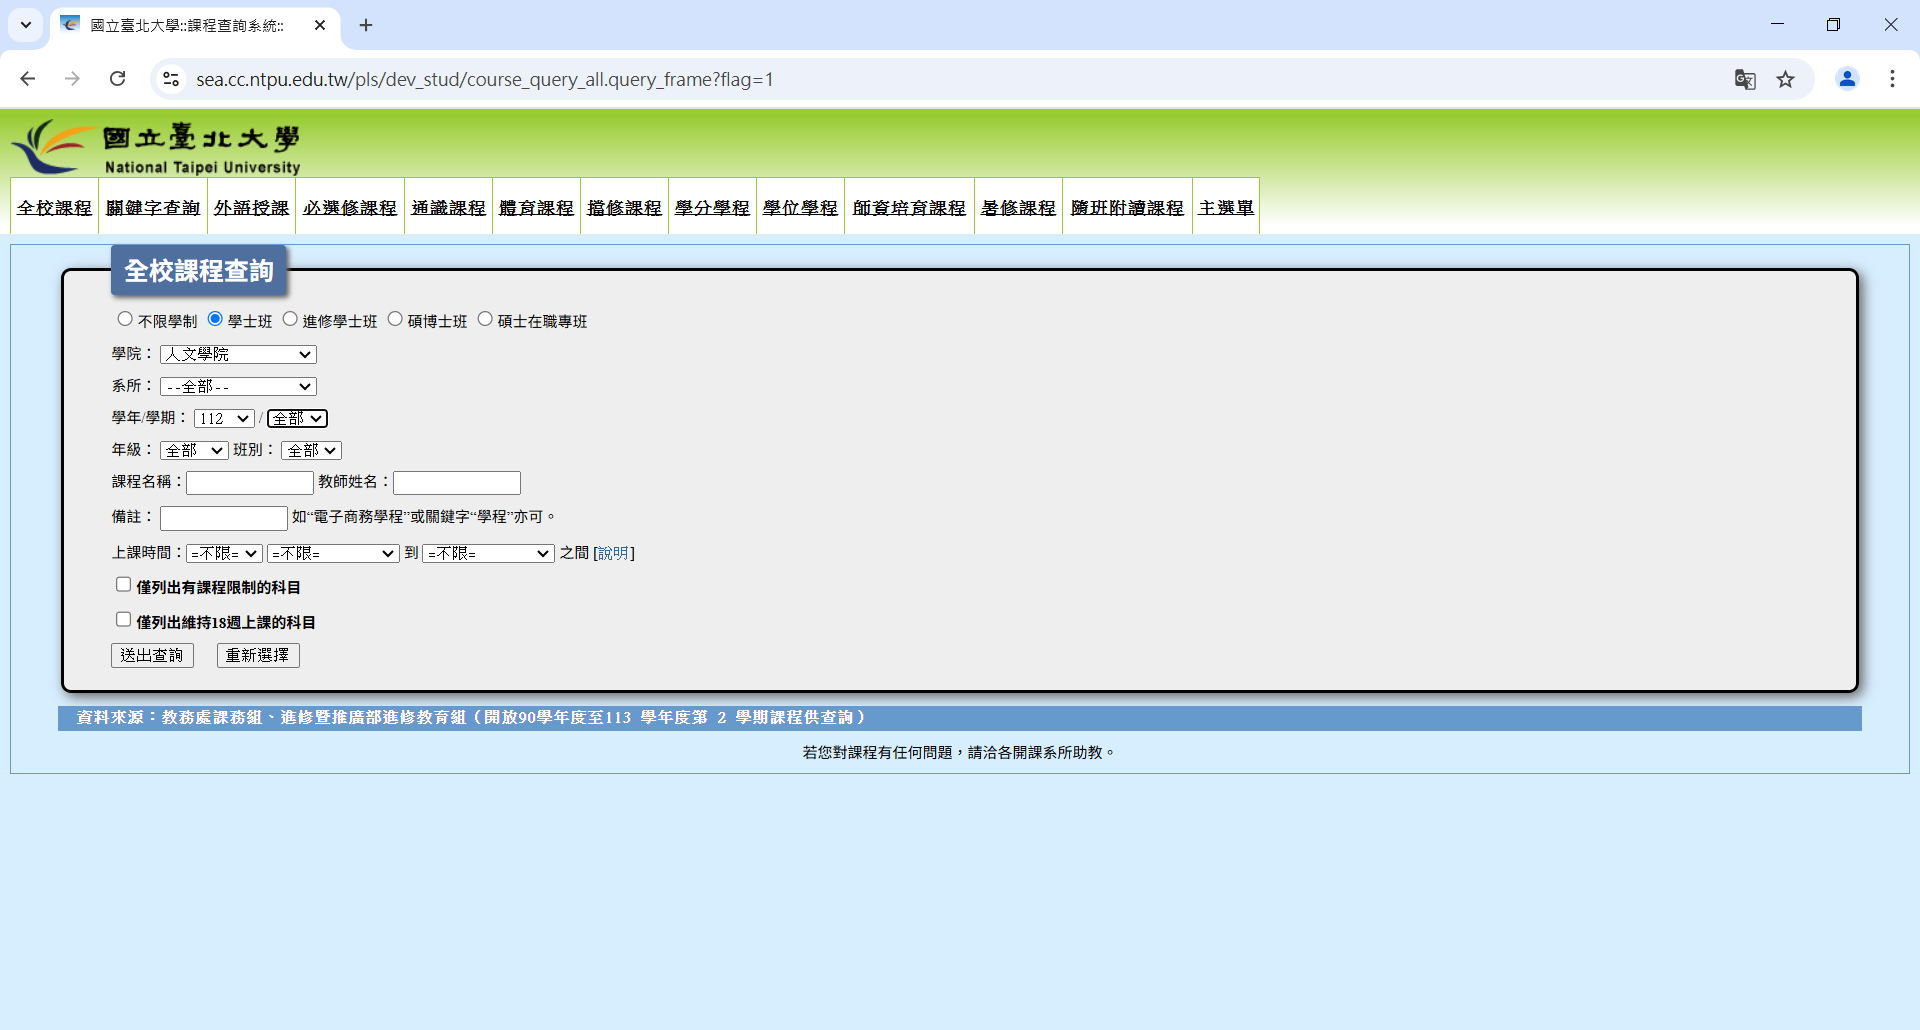

## Step 4: 點擊搜尋

最後，點下搜尋鍵，進入課程查詢的頁面。
我們這邊是使用CSS選擇器，你可以找到像是div、span、button等元素，並且用這些元素來找到你要的搜尋鍵。

在這邊是設定`type="submit"`，所以我們可以用這個來找到搜尋鍵。

In [ ]:
# 初始化並打開頁面
url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query_all.chi_main"
#初始化瀏覽器設定
page = ChromiumPage()
page.get(url)

#找到頁面的所有tr
rows = page.eles(".titletext")

#找到第一個
row = rows[0]
row.click()

page.wait(1)

#有一個select的選單
select = page.eles("xpath://input[@type='radio']")
page.wait(1)
becholar = select[1]
becholar.click()

# page.wait(1)
#找到學院的選單
dep = page.eles("xpath://select")[0]
dep.click()

#選擇你要的學院
dep_option = page.ele("xpath://option[contains(text(),❓❓❓)]")
dep_option.click()

page.wait(1)

#找到開課的選單
year = page.eles("xpath://select")[2]
year.click()

year_option = page.ele("xpath://option[contains(text(),❓❓❓)]")
page.wait(1)
year_option.click()

page.wait(1)
#找到學期的選單
semester = page.eles("xpath://select")[3]
semester.click()

# semester_option = page.ele("xpath://option[contains(text(),'全部')]")
semester_option = page.ele("xpath:/html/body/center/table/tbody/tr/td/table/tbody/tr[1]/td/fieldset/form[2]/p[3]/select[2]/option[1]")
page.wait(1)
semester_option.click()


# #找到查詢按鈕包含文字"送出查詢"
# 使用 CSS 選擇器找到 type 屬性為 submit 的按鈕
submit = page.ele('@type=submit') #記得加上@
submit.click()

#成功回傳
print("成功")

成功


到這邊應該會回傳成功，並跳轉到課程查詢的頁面。

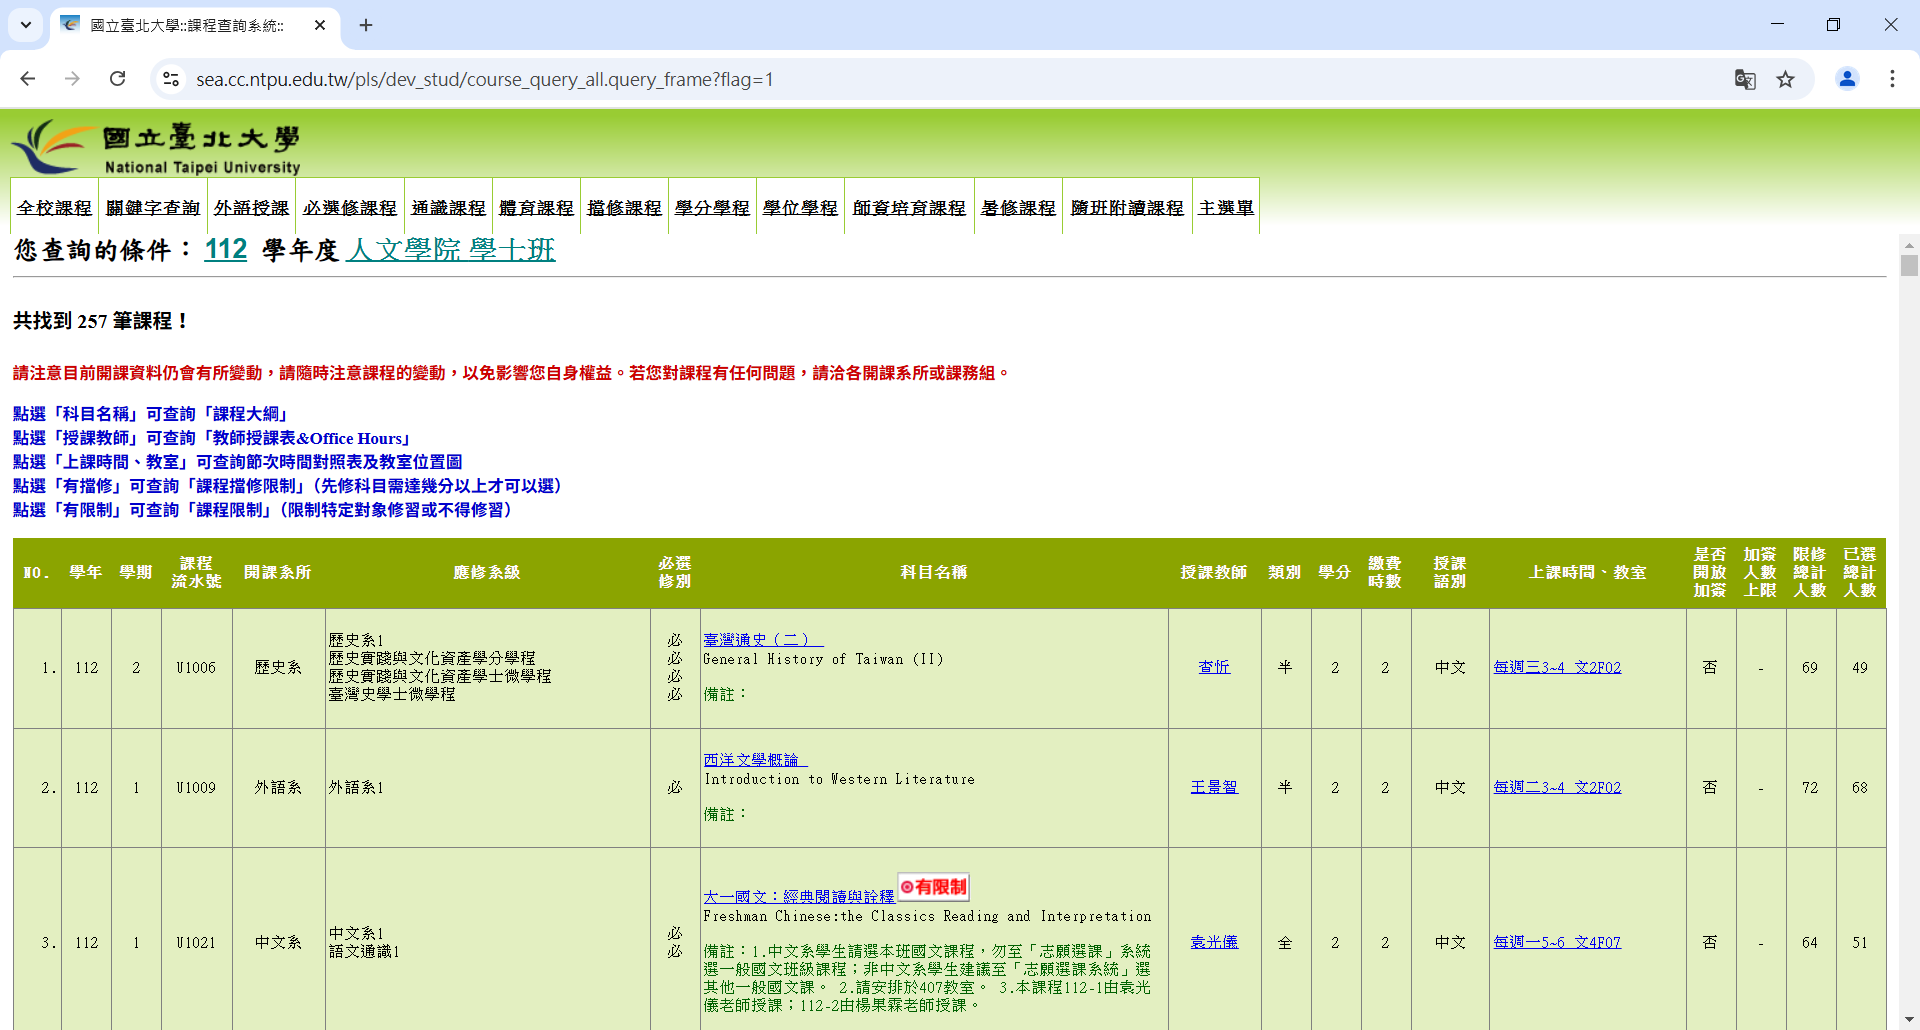

## Step 5: 爬取連結資料
這邊我們要爬取的資料是課程名稱、學分、老師、時間、地點等等。

我想要先抓取所有課程的超連結，這樣我們就可以進入每個課程的頁面，並且抓取更多的資料。

最後，我們可以把這些資料存成一個excel檔，方便我們查看。

### 爬蟲邏輯
1. 進入表格table
2. 找到所有tr(每一列)
3. 找到所有a(超連結)
4. 如果有多種超連結，觀察url的規律和差異，並過濾掉不需要的超連結
5. 把超連結存成一個list並進行編號

這邊可能需要30-90秒的時間不等，根據學院的課程數量有所不同。

#### ⚠️ 注意


In [ ]:
# 初始化並打開頁面
url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query_all.chi_main"
#初始化瀏覽器設定
page = ChromiumPage()
page.get(url)

#找到頁面的所有tr
rows = page.eles(".titletext")

#找到第一個
row = rows[0]
row.click()

page.wait(1)

#有一個select的選單
select = page.eles("xpath://input[@type='radio']")
page.wait(1)
becholar = select[1]
becholar.click()

# page.wait(1)
#找到學院的選單
dep = page.eles("xpath://select")[0]
dep.click()

#選擇你要的學院
dep_option = page.ele("xpath://option[contains(text(),'人文學院')]")
dep_option.click()

page.wait(1)

#找到開課的選單
year = page.eles("xpath://select")[2]
year.click()

year_option = page.ele("xpath://option[contains(text(),'112')]")
page.wait(1)
year_option.click()

page.wait(1)
#找到學期的選單
semester = page.eles("xpath://select")[3]
semester.click()

# semester_option = page.ele("xpath://option[contains(text(),'全部')]")
semester_option = page.ele("xpath:/html/body/center/table/tbody/tr/td/table/tbody/tr[1]/td/fieldset/form[2]/p[3]/select[2]/option[1]")
page.wait(1)
semester_option.click()


# #找到查詢按鈕包含文字"送出查詢"
submit = page.ele('@type=submit') 
submit.click()

#成功回傳
print("成功")


# 定位到目標 table 元素
table_element = page.ele('xpath:/html/body/div[2]/table')

# 獲取 table 元素下的所有 <tr> 元素
tr_elements = table_element.eles('tag:tr') #這個是DrissionPage的寫法

links_info = []

for tr_element in tr_elements:
    # 在 <tr> 元素中查找 <a> 元素
    link_elements = tr_element.eles('tag:a')

    for link_element in link_elements:
        link_url = link_element.attr('href')

        if "queryGuide" in link_url:
            # 將超連結添加到列表中
            # if not link_url.startswith("https://sea.cc.ntpu.edu.tw/pls/dev_stud/"):
            #     link_url = "https://sea.cc.ntpu.edu.tw/pls/dev_stud/" + link_url.split("tw/")[1]
                
            links_info.append({"id": f"art_{str(len(links_info)+1).zfill(3)}", "url": link_url})

# 遍歷並輸出超連結信息
for link_info in links_info:
    print(link_info)
    # https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1006&g_year=112&g_term=2&show_info=part

成功
{'id': 'art_001', 'url': 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1006&g_year=112&g_term=2&show_info=part'}
{'id': 'art_002', 'url': 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1009&g_year=112&g_term=1&show_info=part'}
{'id': 'art_003', 'url': 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1021&g_year=112&g_term=1&show_info=part'}
{'id': 'art_004', 'url': 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1021&g_year=112&g_term=2&show_info=part'}
{'id': 'art_005', 'url': 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1048&g_year=112&g_term=1&show_info=part'}
{'id': 'art_006', 'url': 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1064&g_year=112&g_term=1&show_info=part'}
{'id': 'art_007', 'url': 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1064&g_year=112&g_term=2&show_info=part'}
{'i

## Step 6. 確認第一份資料是否正確
成功的話將資料儲存成excel檔。
請將路徑換成你想存放的檔案位置。

In [ ]:
import pandas as pd

# 轉換為 DataFrame
df = pd.DataFrame(links_info)

# 儲存成 Excel 檔案
excel_path = "你的檔案路徑與檔案名稱"
df.to_excel(excel_path, index=False)

print(f"成功儲存到 {excel_path}")

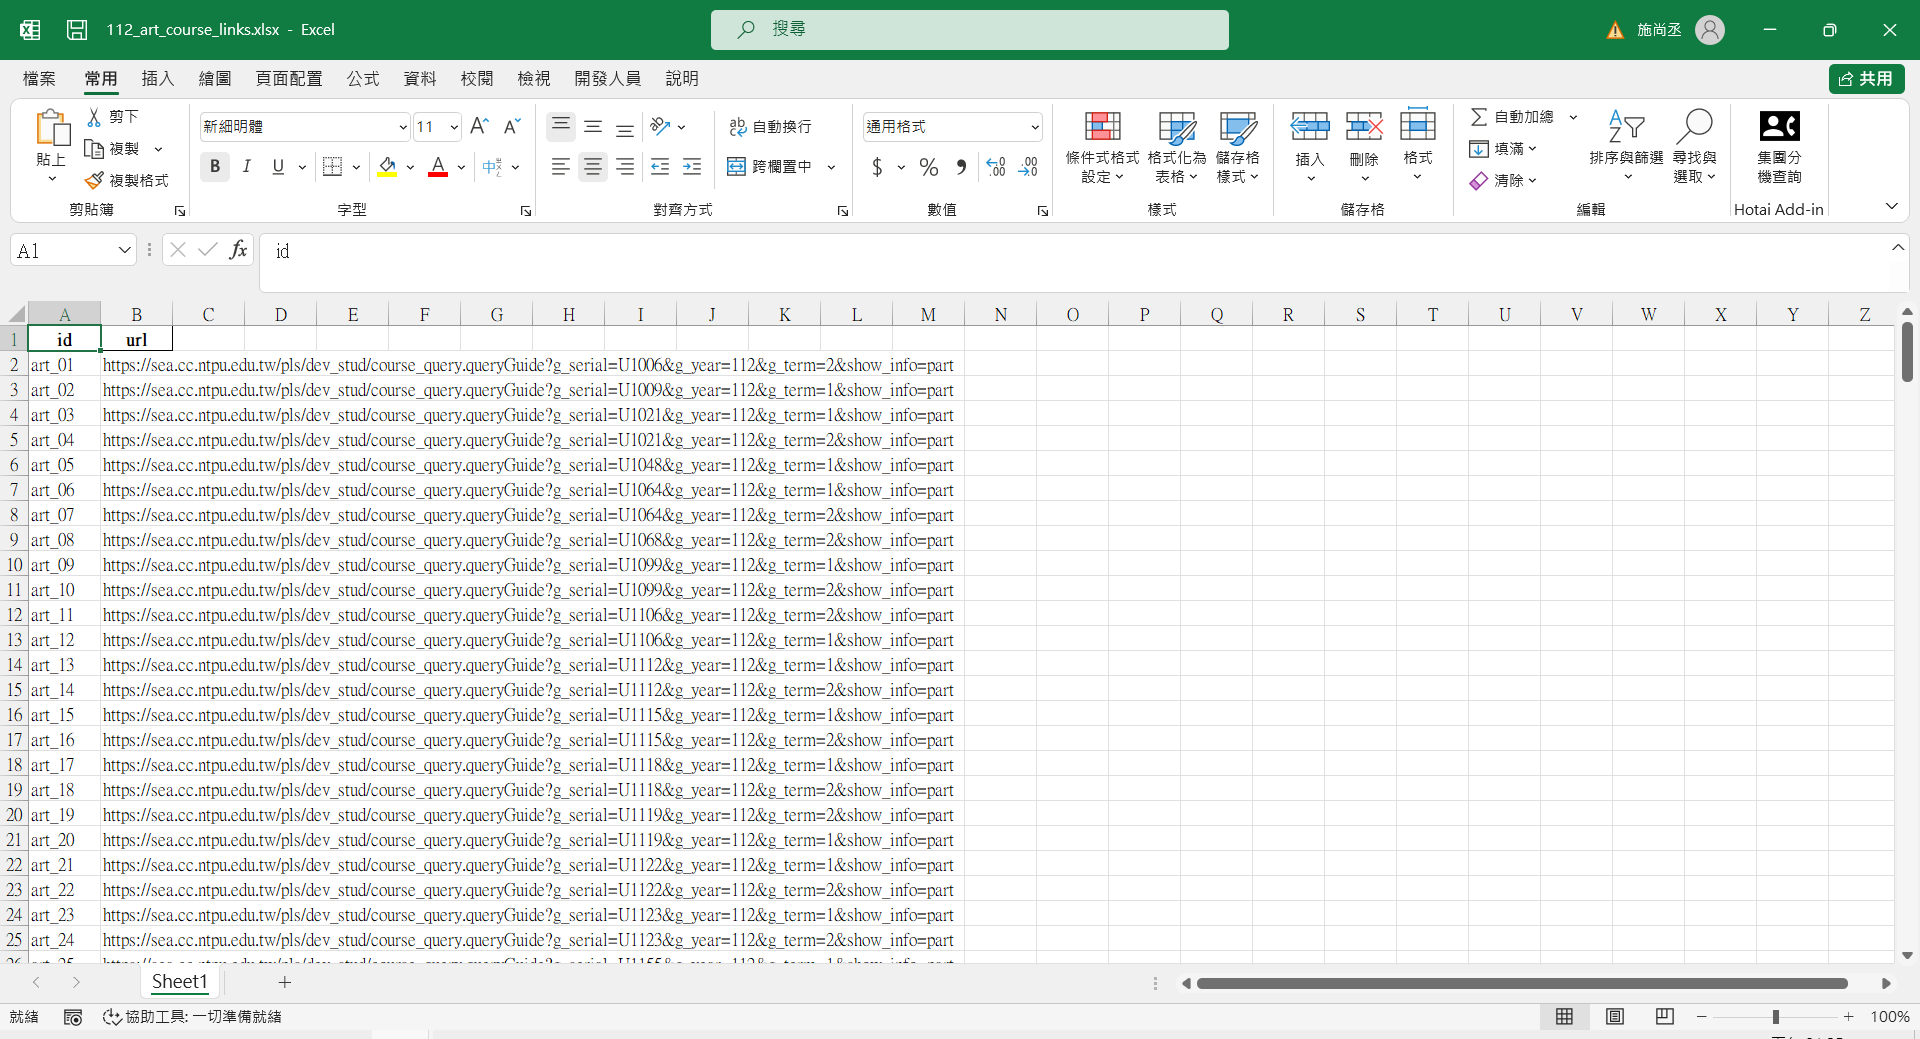

## Step 7. 爬取所有目標資料

In [ ]:
#還沒有套件BeautifulSoup、requests、pandas、openpyxl
# !pip install BeautifulSoup4
# !pip install requests
# !pip install openpyxl


先確認是否可以正確讀取第一份資料，再進行下一步。

#### 補充: 
其實這邊也可以使用openxyl套件來進行資料處理，但是這邊我們使用pandas套件來進行資料處理。
相較起來pandas程式碼更簡單、更快速。

#### Pandas iloc說明
- iloc是根據行索引和列索引（index，columns）進行索引的，都是從0開始
- iloc[row，columns]
- iloc[:,1] 我要所有列的第二行

[參考網址](https://medium.com/@hupinwei/pandas-iloc%E8%AA%AA%E6%98%8E-dc6ebe212cd2)

In [ ]:
import pandas as pd
from DrissionPage import WebPage

# 讀取 Excel 檔案
excel_path = r"C:\Users\SHI\Desktop\112_art_course_links.xlsx"
df = ❓❓❓  # 讀取 Excel
urls = ❓❓❓ # 假設 URL 在第 2 欄，去除空值，並且變成列表

print(urls[0:3])

['https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1006&g_year=112&g_term=2&show_info=part', 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1009&g_year=112&g_term=1&show_info=part', 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1021&g_year=112&g_term=1&show_info=part']


### 切換為無頭瀏覽器，進入每個超連結

確認確實抓到數據後，這邊我們就要使用類似beautifulsoup的方法，進入`無頭瀏覽器`，並且進入每個超連結，抓取我們要的資料。

因為這樣的方式是直接跟伺服器要資料，所以速度會比起前面的內容快很多。


#### 注意⚠️ 
無頭瀏覽器較為適用於後端渲染的網頁，若是前端渲染的網頁，則需要使用selenium或DrissionPage的chrome模式。

可以去觀察html的結構中，是否有很多的 `<script>` 標籤，若有，則可能是前端渲染的網頁。

同樣的，我們需要觀察網頁的結構。

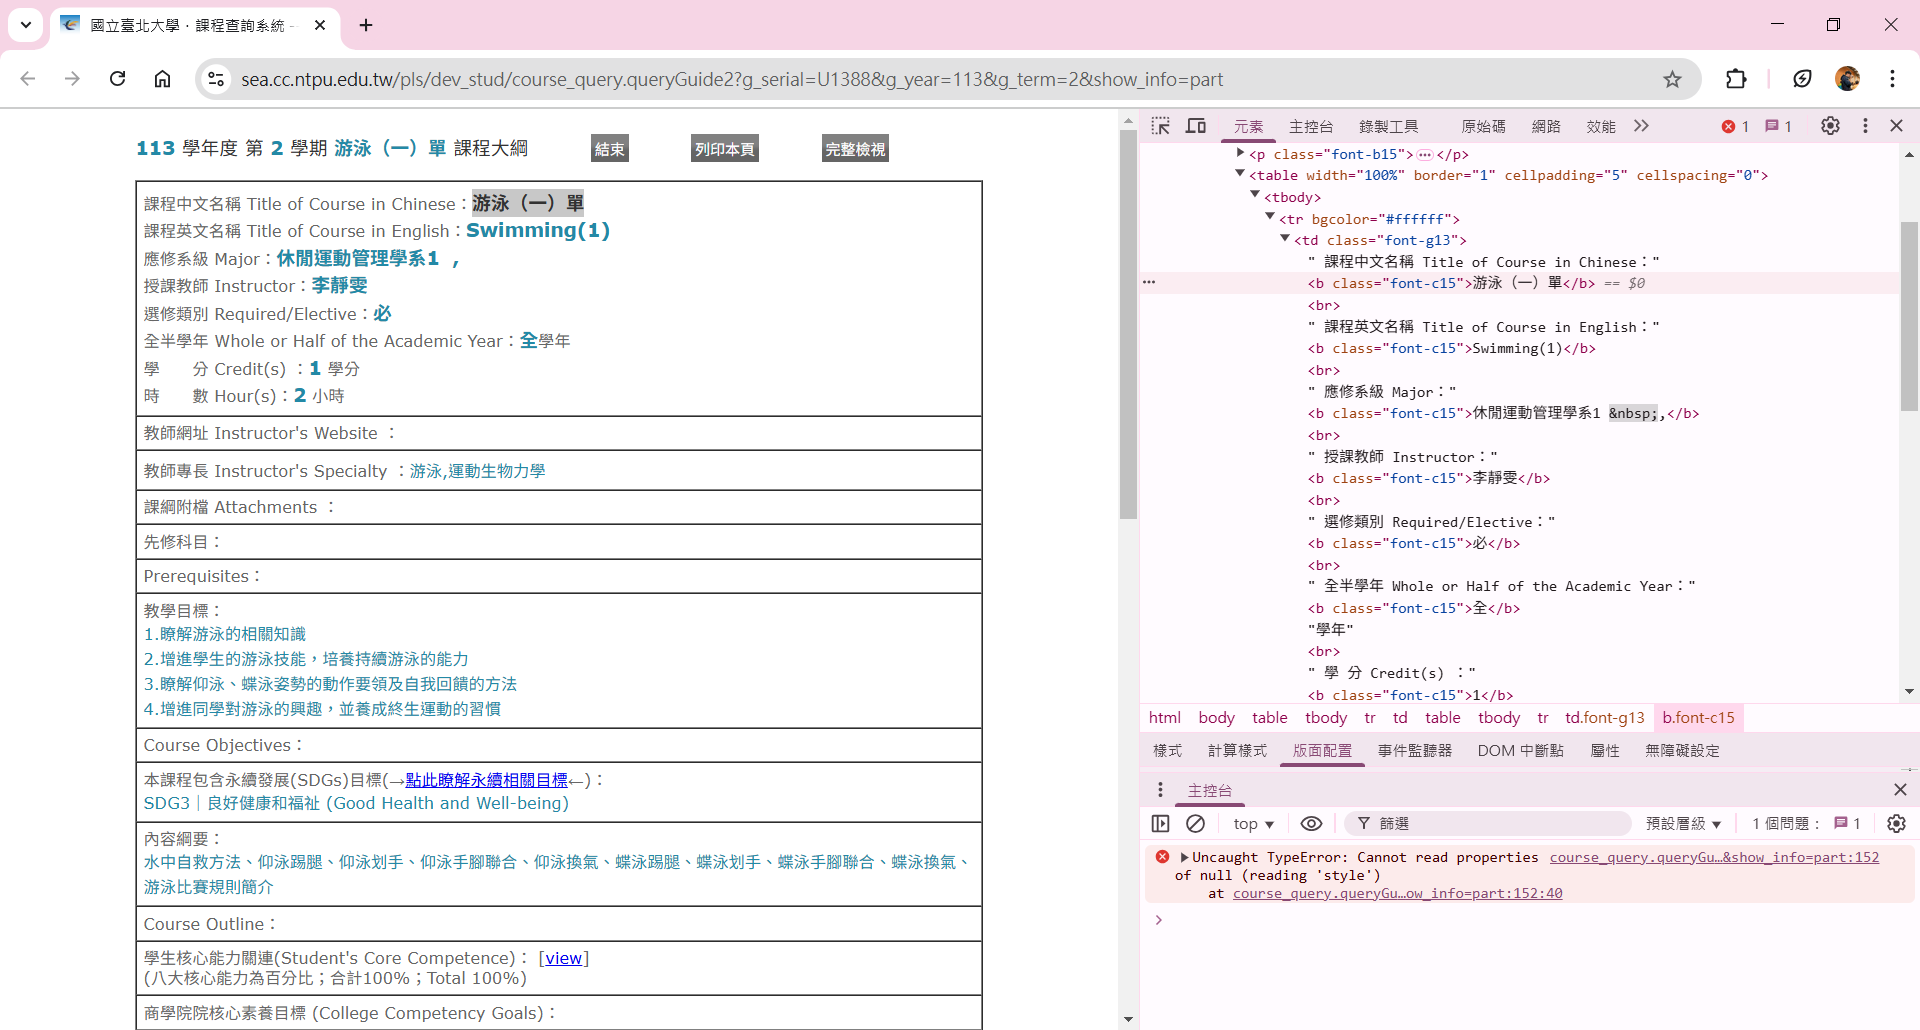

我發現表格中每一個大方框都有相同的`class`，所以我們可以用這個class來找到我們要的資料。

In [ ]:
import pandas as pd
from DrissionPage import WebPage

# 讀取 Excel 檔案
excel_path = r"C:\Users\SHI\Desktop\112_art_course_links.xlsx"
df = pd.read_excel(excel_path)  # 讀取 Excel
urls = df["url"].dropna().tolist() # 假設 URL 在第 2 欄，去除空值，並且變成列表

print(urls[0:3])

# 初始化瀏覽器
page = WebPage()
# 存儲爬取結果
data = []

for url in urls[0:3]:
    page.get(url) 
    print("good")# 打開網址
    course_name = page.ele('.font-g13').text
    print(course_name)

['https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1006&g_year=112&g_term=2&show_info=part', 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1009&g_year=112&g_term=1&show_info=part', 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1021&g_year=112&g_term=1&show_info=part']
good
課程中文名稱 Title of Course in Chinese：臺灣通史（二）
課程英文名稱 Title of Course in English：General History of Taiwan (II)
應修系級 Major：歷史學系1  ,歷史實踐與文化資產學分學程  ,歷史實踐與文化資產學士微學程  ,臺灣史學士微學程  ,
授課教師 Instructor：查忻
選修類別 Required/Elective：必
全半學年 Whole or Half of the Academic Year：半學年
學　　分 Credit(s)：2學分
時　　數 Hour(s)：2小時

good
課程中文名稱 Title of Course in Chinese：西洋文學概論
課程英文名稱 Title of Course in English：Introduction to Western Literature
應修系級 Major：應用外語學系1  ,
授課教師 Instructor：王景智
選修類別 Required/Elective：必
全半學年 Whole or Half of the Academic Year：半學年
學　　分 Credit(s)：2學分
時　　數 Hour(s)：2小時

good
課程中文名稱 Title of Course in Chinese：大一國文：經典閱讀與詮釋
課程英文名稱 Title of Course in Englis

我們已經成功進入超連結的頁面了，也有找到我們要的資料。

接下來我們要把這些資料整理成結構化的資料，並且存成excel檔。

In [ ]:
import pandas as pd
import re
from DrissionPage import WebPage

# 讀取 Excel 檔案
excel_path = r"C:\Users\SHI\Desktop\112_art_course_links.xlsx"
df = pd.read_excel(excel_path)  # 讀取 Excel
urls = df.iloc[:, 1].dropna().tolist()  # 假設 URL 在第 2 欄，去除空值

print(urls[0:3])  # 測試前 3 個網址

# 初始化瀏覽器
page = WebPage()

# 存儲爬取結果
course_data = []

# 定義要解析的欄位（正則匹配）
pattern = {
    "課程中文名稱": r"課程中文名稱.*?：(.*)",
    "課程英文名稱": r"課程英文名稱.*?：(.*)",
    "應修系級": r"應修系級.*?：(.*)",
    "授課教師": r"授課教師.*?：(.*)",
    "選修類別": r"選修類別.*?：(.*)",
    "全半學年": r"全半學年.*?：(.*)",
    "學分": r"學\s*?分.*?：(\d+)學分",
    "時數": r"時\s*?數.*?：(\d+)小時"
}

# 爬取並解析課程資訊
for url in urls[0:3]:  # 測試前 3 個網址
    try:
        page.get(url)  # 打開網址
        print("成功開啟:", url)

        course_info = page.ele('.font-g13').text  # 抓取包含課程資訊的區塊
        print(course_info)  # 測試輸出

        data = {}
        for key, regex in pattern.items():
            match = re.search(regex, course_info)
            data[key] = match.group(1).strip() if match else None

        course_data.append(data)

    except Exception as e:
        print(f"爬取失敗 {url}: {e}")
        course_data.append({"課程中文名稱": "錯誤", "課程英文名稱": "錯誤"})  # 錯誤時填入預設值

# 存入 DataFrame
df_output = ❓❓❓

# 儲存成 Excel 檔案
output_path = r"你想要儲存的路徑"


['https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1006&g_year=112&g_term=2&show_info=part', 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1009&g_year=112&g_term=1&show_info=part', 'https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1021&g_year=112&g_term=1&show_info=part']
成功開啟: https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1006&g_year=112&g_term=2&show_info=part
課程中文名稱 Title of Course in Chinese：臺灣通史（二）
課程英文名稱 Title of Course in English：General History of Taiwan (II)
應修系級 Major：歷史學系1  ,歷史實踐與文化資產學分學程  ,歷史實踐與文化資產學士微學程  ,臺灣史學士微學程  ,
授課教師 Instructor：查忻
選修類別 Required/Elective：必
全半學年 Whole or Half of the Academic Year：半學年
學　　分 Credit(s)：2學分
時　　數 Hour(s)：2小時

成功開啟: https://sea.cc.ntpu.edu.tw/pls/dev_stud/course_query.queryGuide?g_serial=U1009&g_year=112&g_term=1&show_info=part
課程中文名稱 Title of Course in Chinese：西洋文學概論
課程英文名稱 Title of Course in English：Introduction to Western Literature
應修

最後儲存就大功告成啦!

In [ ]:
df_output.to_excel(output_path, index=False)
print(f"成功儲存到 {output_path}")

成功儲存到 C:\Users\SHI\Desktop\112_art_course_info.xlsx


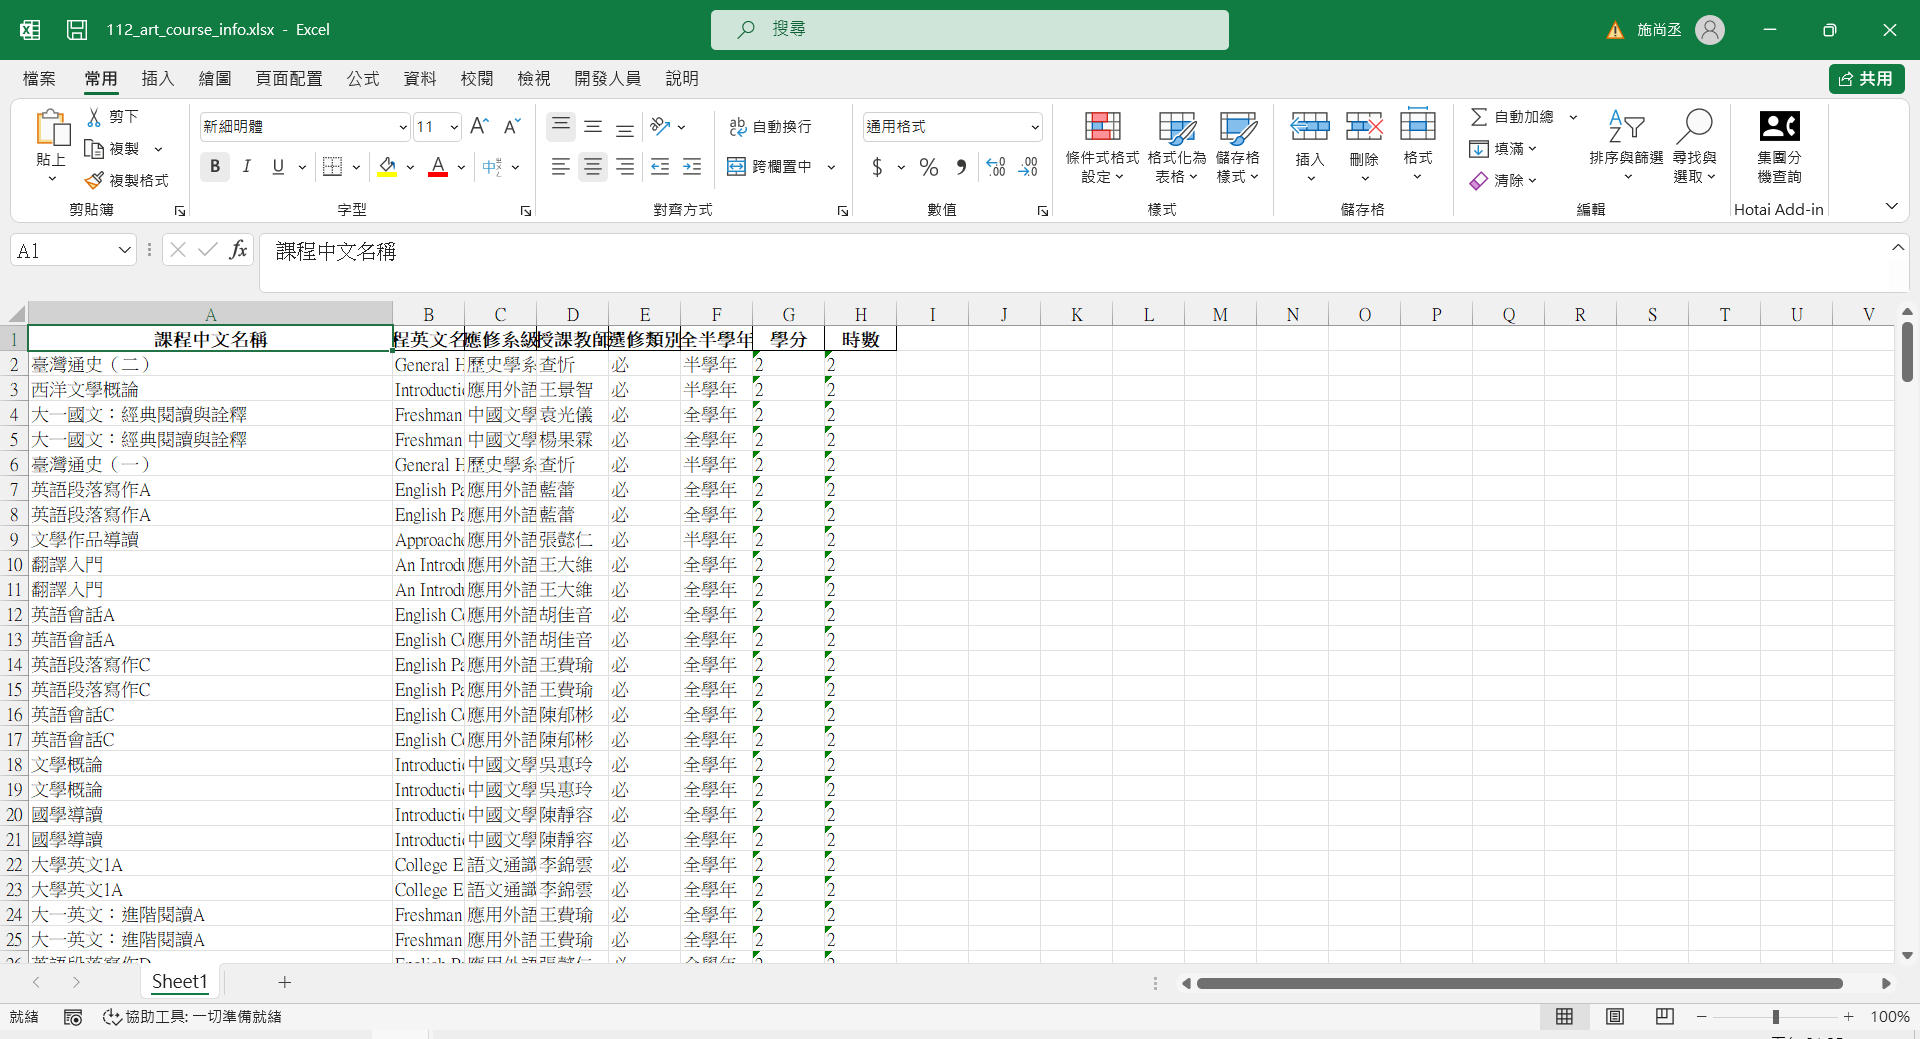